# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 560


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | brooks
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | tombodu
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | fort mcmurray
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | skeldon
Processing Record 15 of Set 1 | san antonio de pale
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | nelidovo
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | burutu
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | pletten

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,19.86,64,18,0.45,US,1717975619
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,75,75,5.81,RU,1717975722
2,brooks,50.5834,-111.8851,20.99,41,86,2.57,CA,1717975723
3,haiku-pauwela,20.9219,-156.3051,30.12,61,20,10.29,US,1717975724
4,margaret river,-33.9500,115.0667,16.19,56,97,10.80,AU,1717975725


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.86,64,18,0.45,US,1717975619
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,75,75,5.81,RU,1717975722
2,brooks,50.5834,-111.8851,20.99,41,86,2.57,CA,1717975723
3,haiku-pauwela,20.9219,-156.3051,30.12,61,20,10.29,US,1717975724
4,margaret river,-33.9500,115.0667,16.19,56,97,10.80,AU,1717975725


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

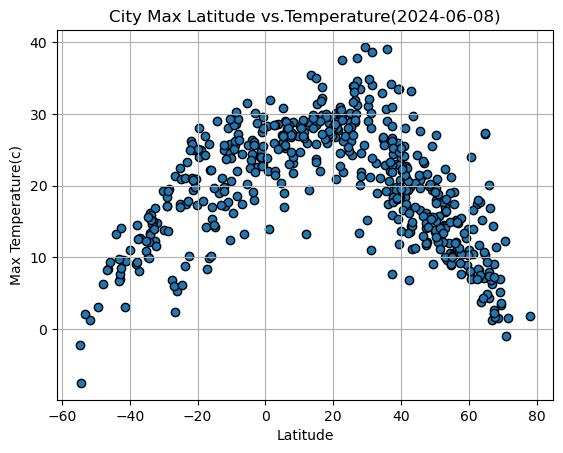

In [10]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,edgecolors="black",marker="o")
plt.grid(True)
# Incorporate the other graph properties
plt.title("City Max Latitude vs.Temperature(2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(c)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

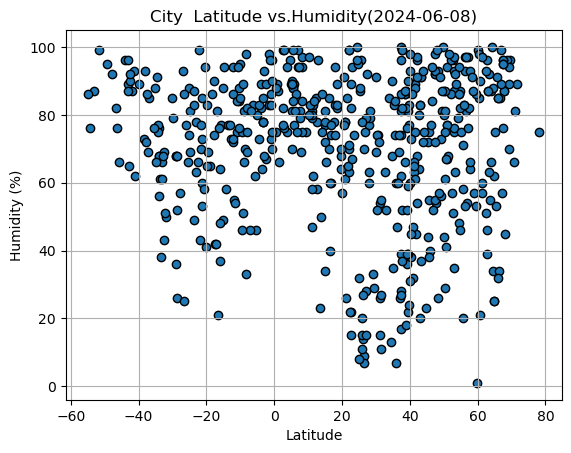

In [11]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,edgecolors="black",marker="o")
plt.grid(True)
plt.title("City  Latitude vs.Humidity(2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

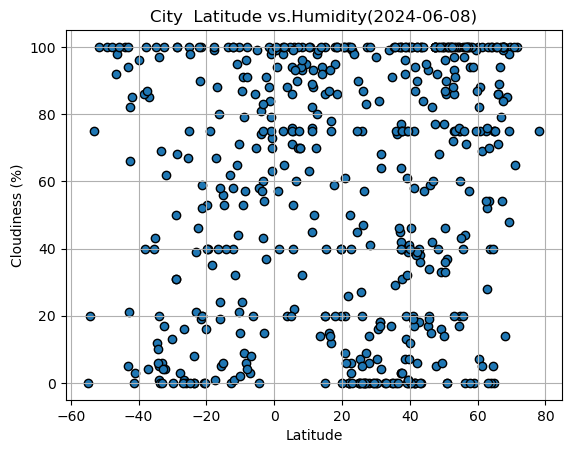

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",marker="o")
plt.grid(True)
plt.title("City  Latitude vs.Humidity(2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

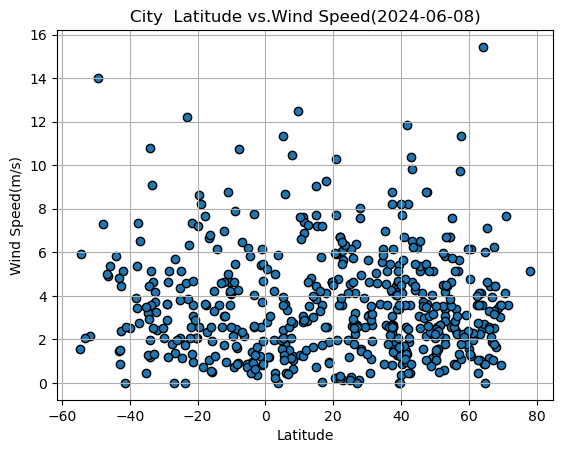

In [13]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",marker="o")
plt.grid(True)
plt.title("City  Latitude vs.Wind Speed(2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression (col_1, col_2, col_1_name: str, col_2_name: str):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(col_1, col_2)
    regress_values = col_1 * slope + intercept
    annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Calculate the position of annotation dynamically
    
    x_coord = min(col_1) 
    y_coord = min(col_2) 
    
    print(f"The r-squared-value is: {round(rvalue**2, 4)}")
    
    plt.scatter(col_1, col_2,alpha=0.75,edgecolors="black")
    plt.plot(col_1, regress_values, "r-")
    plt.xlabel(col_1_name)
    plt.ylabel(col_2_name)
    plt.annotate(annotation, (x_coord, y_coord), color="red", fontsize=12)
    
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.86,64,18,0.45,US,1717975619
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,75,75,5.81,RU,1717975722
2,brooks,50.5834,-111.8851,20.99,41,86,2.57,CA,1717975723
3,haiku-pauwela,20.9219,-156.3051,30.12,61,20,10.29,US,1717975724
5,tombodu,8.1333,-10.6167,23.22,94,32,0.66,SL,1717975726


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,margaret river,-33.9500,115.0667,16.19,56,97,10.80,AU,1717975725
7,port elizabeth,-33.9180,25.5701,13.37,76,1,1.95,ZA,1717975727
9,adamstown,-25.0660,-130.1015,22.43,74,100,4.36,PN,1717975729
12,waitangi,-43.9535,-176.5597,13.23,96,100,5.81,NZ,1717975731
14,san antonio de pale,-1.4014,5.6325,24.76,83,100,5.43,GQ,1717975733


###  Temperature vs. Latitude Linear Regression Plot

The r-squared-value is: 0.5502


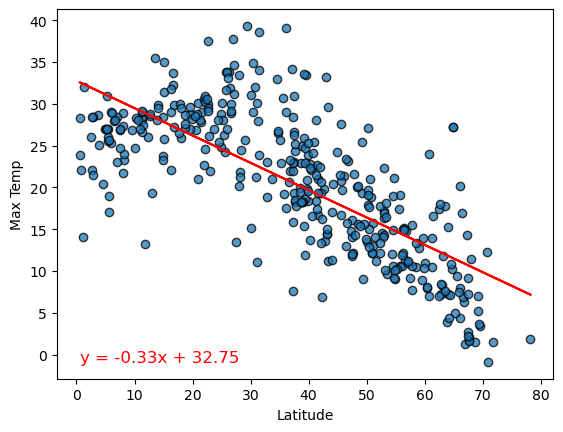

In [48]:
# Linear regression on Northern Hemisphere
# Example usage
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp"
)





The r-squared-value is: 0.615


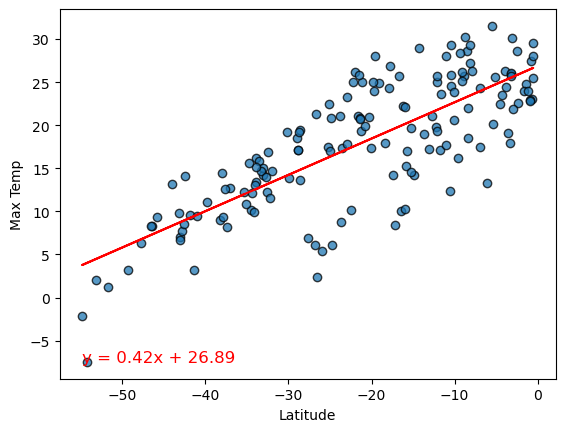

In [49]:
# Linear regression on Southern Hemisphere
# Example usage
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp"
)



**Discussion about the linear relationship:** 

In Northern Hemisphere the Latitude and Max temperature are negatively but moderately corelated which it indicates as the latitude increases the temp recorded would increase .

The rsquared value of 0.55  indicates a positive corelation and 55% the model replicates the data

In Southern hemisphere ,both parameters are positively and moderately corelated which indicated as lat increases ,max temp would also increase.The rsquared value of o.6 indicates that the 60% the model replicates the data and latitude is resposible for 60% of variance in the max temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-squared-value is: 0.0003


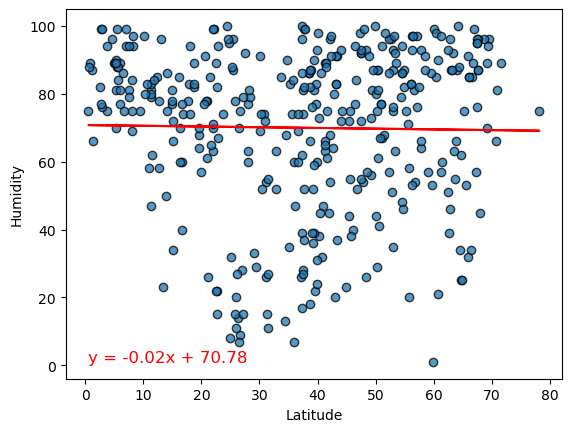

In [52]:
# Northern Hemisphere
# Example usage
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity"
)

The r-squared-value is: 0.0012


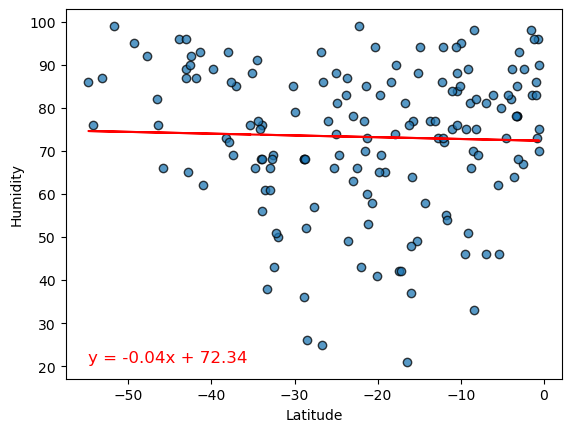

In [53]:
# Southern Hemisphere
# Example usage
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity"
)

**Discussion about the linear relationship:** 
Northern Hemiphere: The low r squared value indicates extremely low corelation between latitudea and Humidity and the Humidity variance is not explained by the Latitude,linear equation of slope indicates slight increase in humidity with latitude.
Southern Hempisphere : The low r squared value indicates very low corealtion and from the graph as there is mild increase in humidity as latitude increases

overall the model is not a good predictive for the data ,and would consider other influencing factors

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared-value is: 0.0047


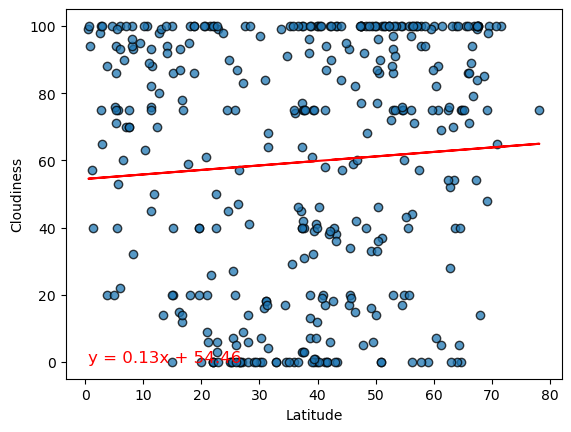

In [54]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness"
)

The r-squared-value is: 0.0041


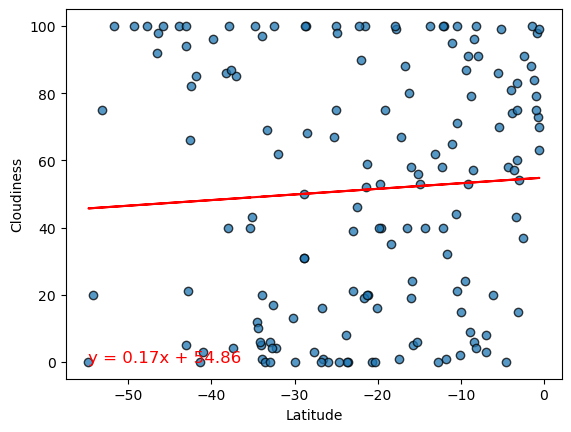

In [55]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness"
)

**Discussion about the linear relationship:** 
Northern Hemiphere: The low r squared value indicates extremely low corelation between latitudea and cloudiness and the Humidity variance is not explained by the Latitude,linear equation of slope indicates slight increase in humidity with latitude.
Southern Hempisphere : The low r squared value indicates very low corealtion and from the graph as there is mild increase in clodiness as latitude increases

overall the model is not a good predictive for the data ,and would consider other influencing factors

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared-value is: 0.0008


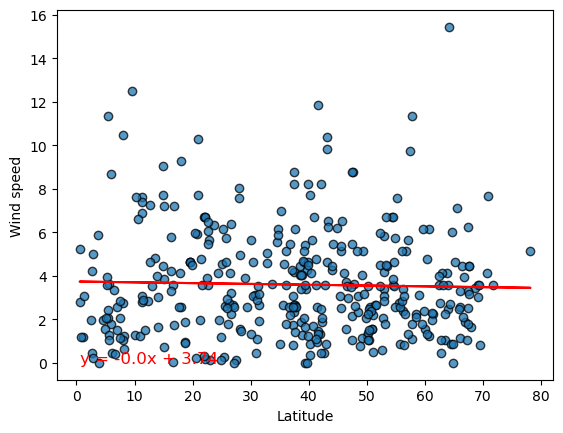

In [56]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind speed"
)

The r-squared-value is: 0.0139


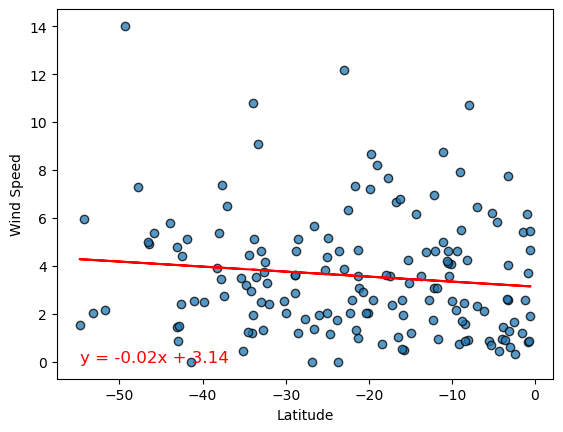

In [58]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed"
)

**Discussion about the linear relationship:** 
Very low r squared value in both North and  South hempispheres inidicates there is no corelation between windspeed and latitude.

The model is not a good fit for the data. 

The variance of windspeed is not affected by the latitude and should consider other  variables for predicting wind speed.